<a href="https://colab.research.google.com/github/sidharkal/Analytics-Olympiad-2022-/blob/main/Analytics_Olympiad_2022_XGB_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Data Preprocessing Libraries
import pandas as pd
import numpy as np

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold

import warnings 
warnings.filterwarnings('ignore')

In [2]:
train =  pd.read_csv("/content/train.csv")
test =  pd.read_csv("/content/test.csv")
solution =  pd.read_csv("/content/submission.csv")
train.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan


In [3]:
train.shape

(105000, 18)

In [4]:
# Explore the format
print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Train shape: (105000, 18)
Test shape: (45000, 17)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  float64
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [6]:
train = train.iloc[:105000,:]
train.tail()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
104995,19557,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,0.0,0.0,31885,9000.0,2,0,0,0.0,SUV
104996,222459,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,1.0,0.0,32277,10000.0,0,0,0,1.0,Sedan
104997,83089,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,1.0,0.0,34800,11000.0,0,0,0,1.0,Sedan
104998,984879,40-64,female,20-29y,high school,working class,0.483571,1.0,before 2015,0.0,0.0,10238,10000.0,0,0,0,0.0,HatchBack
104999,139618,65+,female,20-29y,high school,upper class,0.468710,1.0,after 2015,0.0,1.0,10238,14000.0,0,0,0,1.0,HatchBack


In [7]:
df = train.select_dtypes(include=['float64','int64'])

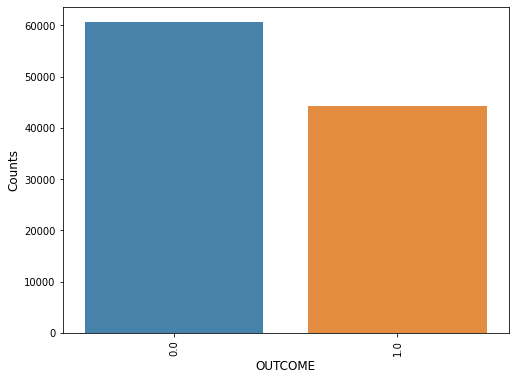

In [8]:
# Plot of the target column
label_counts = train.OUTCOME.value_counts()
plt.figure(figsize = (8,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('OUTCOME', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

# Data Preprocessing 

In [9]:
train["VEHICLE_OWNERSHIP"] = train["VEHICLE_OWNERSHIP"].astype("object")
train["MARRIED"] = train["MARRIED"].astype("object")
train["CHILDREN"] = train["CHILDREN"].astype("object")
train["POSTAL_CODE"] = train["POSTAL_CODE"].astype("object")
train["SPEEDING_VIOLATIONS"] = train["SPEEDING_VIOLATIONS"].astype("object")
train["DUIS"] = train["DUIS"].astype("object")
train["PAST_ACCIDENTS"] = train["PAST_ACCIDENTS"].astype("object")
train["OUTCOME"] = train["OUTCOME"].astype("object")

test["VEHICLE_OWNERSHIP"] = test["VEHICLE_OWNERSHIP"].astype("object")
test["MARRIED"] = test["MARRIED"].astype("object")
test["CHILDREN"] = test["CHILDREN"].astype("object")
test["POSTAL_CODE"] = test["POSTAL_CODE"].astype("object")
test["SPEEDING_VIOLATIONS"] = test["SPEEDING_VIOLATIONS"].astype("object")
test["DUIS"] = test["DUIS"].astype("object")
test["PAST_ACCIDENTS"] = test["PAST_ACCIDENTS"].astype("object")

In [10]:
# Select ONLY categorical columns
categ_cols = [col for col in train.columns if train[col].dtype in ["object"]]
categ_cols

['AGE',
 'GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'OUTCOME',
 'TYPE_OF_VEHICLE']

In [11]:
cat_col = ['AGE', 'GENDER','DRIVING_EXPERIENCE','EDUCATION','INCOME','VEHICLE_OWNERSHIP','VEHICLE_YEAR',
           'MARRIED','CHILDREN', 'SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS','TYPE_OF_VEHICLE']

In [12]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
XX = enc.fit_transform(train[cat_col])
X_Train = pd.DataFrame.sparse.from_spmatrix(XX, columns=[list(enc.get_feature_names_out())])

In [13]:
XX_test = enc.transform(test[cat_col])
X_Test = pd.DataFrame.sparse.from_spmatrix(XX_test, columns=[list(enc.get_feature_names_out())])

In [14]:
neu_col = ['CREDIT_SCORE','ANNUAL_MILEAGE']

In [15]:
X = pd.concat([X_Train,train[neu_col]],axis=1)
X.shape

(105000, 75)

In [16]:
X_test = pd.concat([X_Test,test[neu_col]],axis=1)
X_test.shape

(45000, 75)

In [17]:
y = train['OUTCOME']

features = list(X.columns)

X   = X.to_numpy()
y   = y.to_numpy().reshape(-1, 1)

X_testt = X_test[features]
X_test = X_testt.to_numpy()

# XGB Classifier

In [18]:
kf = KFold(n_splits=5, random_state = 42, shuffle = True)

preds = np.zeros((X_test.shape[0],))
oof_preds = np.zeros((train.shape[0],))

for  fold , (train_index, test_index) in enumerate(kf.split(X)):
    print(60*"*")
    print("Fold {}:".format(fold))

    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = df.OUTCOME[train_index].values, df.OUTCOME[test_index].values

    clf = XGBClassifier(objective='binary:logistic',eval_metric='logloss')

    clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], 
                  early_stopping_rounds=100, verbose=50)
    
    preds += clf.predict_proba(X_test)[:,1]/5

    oof_preds[test_index] = clf.predict(X_valid)

    print(f"\nFold-{fold+1} | accuracy_score: {accuracy_score(y_valid, oof_preds[test_index])}\n")

print(100*"*")   
model_acc = accuracy_score(df.OUTCOME, oof_preds)
print(f"All Folds | ACCURACY: {model_acc}\n")

************************************************************
Fold 0:
[0]	validation_0-logloss:0.690808	validation_1-logloss:0.69087
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 100 rounds.
[50]	validation_0-logloss:0.679444	validation_1-logloss:0.681202
[99]	validation_0-logloss:0.678366	validation_1-logloss:0.681393

Fold-1 | accuracy_score: 0.5773333333333334

************************************************************
Fold 1:
[0]	validation_0-logloss:0.690769	validation_1-logloss:0.690892
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 100 rounds.
[50]	validation_0-logloss:0.679249	validation_1-logloss:0.681684
[99]	validation_0-logloss:0.678152	validation_1-logloss:0.681908

Fold-2 | accuracy_score: 0.5763809523809523

***************************************************

In [19]:
preds.shape

(45000,)

In [20]:
preds[:5]

array([0.42379045, 0.43931849, 0.41304494, 0.41378281, 0.41844536])

In [21]:
sub = pd.DataFrame({'OUTCOME':preds})
sub.head()

,OUTCOME
0,0.423790
1,0.439318
2,0.413045
3,0.413783
4,0.418445


In [22]:
sub.to_csv("Solution.csv",index=False)